# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

### Objetivo:

El objetivo de este proyecto es analizar el comportamiento de los clientes de la empresa de telecomunicaciones Megaline en relación con sus planes de prepago, "Surf" y "Ultimate", y evaluar cuál de estos genera más ingresos. A través de un análisis detallado de datos de uso de llamadas, mensajes y tráfico de Internet de 500 clientes durante el año 2018, el proyecto busca identificar patrones de consumo, evaluar la rentabilidad de cada plan y proporcionar recomendaciones para la optimización de los ingresos. Este análisis apoyará a Megaline en la toma de decisiones estratégicas respecto a la asignación de presupuesto publicitario y la posible adaptación de los planes a las necesidades de los clientes.

### Etapas 

Los datos sobre el comportamiento de los clientes y sus patrones de consumo se encuentran en diferentes archivos CSV que contienen registros de llamadas, mensajes, sesiones de Internet, detalles de planes y usuarios. Dado que no se tiene información sobre la calidad de los datos, se deberá evaluar su consistencia y completitud antes de comenzar el análisis.

Primero, se realizará una evaluación inicial de la calidad de los datos para identificar posibles problemas y decidir cómo tratarlos en el preprocesamiento. Posteriormente, se enriquecerán los datos y se agregará información adicional relevante para el análisis de los ingresos por plan.

El proyecto se desarrollará en las siguientes etapas:

1. Descripción y Exploración de los Datos: Se realizará una exploración inicial de cada conjunto de datos para comprender su estructura y calidad. Se identificarán posibles problemas como valores nulos, tipos de datos incorrectos o valores atípicos.

2. Preprocesamiento y Enriquecimiento de Datos: En esta etapa, se corregirán los problemas críticos de calidad de datos y se realizarán transformaciones para estandarizar las variables. También se agregarán columnas adicionales que faciliten el análisis, como el cálculo de cargos adicionales y la duración de suscripción.

3. Análisis del Comportamiento de los Usuarios por Plan: Se evaluará el comportamiento de los usuarios de cada plan en cuanto a su uso de llamadas, mensajes y datos. Esto incluirá análisis descriptivos para identificar patrones de consumo por tipo de plan.

4. Cálculo y Análisis de Ingresos por Plan: Se calculará el ingreso mensual generado por cada usuario de acuerdo con su plan y sus cargos adicionales. Luego, se analizarán las diferencias de ingresos entre los planes y se identificará el plan que genera más ingresos para la empresa.

5. Pruebas de Hipótesis: Se formularán y probarán hipótesis estadísticas para comparar los ingresos medios entre los planes y entre diferentes regiones geográficas, identificando diferencias significativas.

6. Conclusión y Recomendaciones: Con base en los resultados del análisis y las pruebas de hipótesis, se desarrollarán conclusiones y recomendaciones estratégicas para la empresa. Se sugerirán acciones específicas para optimizar los planes y mejorar la rentabilidad.

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd          
import numpy as np            
import matplotlib.pyplot as plt  
import seaborn as sns         
from scipy import stats   

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

# Visualizar las primeras filas de cada DataFrame para verificar que los datos se hayan cargado correctamente
display("Calls Data:")
display(calls.head())
print()
display("\nInternet Data:")
display(internet.head())
print()
display("\nMessages Data:")
display(messages.head())
print()
display("\nPlans Data:")
display(plans.head())
print()
display("\nUsers Data:")
display(users.head())

'Calls Data:'

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


'\nInternet Data:'

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


'\nMessages Data:'

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


'\nPlans Data:'

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


'\nUsers Data:'

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


## Preparar los datos

En esta etapa, se busca procesar y preparar los datos crudos para asegurar que estén completos, consistentes y en un formato adecuado para el análisis. A continuación, se presentan los pasos a seguir en el preprocesamiento y limpieza de datos.

1. Exploración Inicial de los Datos
2. Corrección de Tipos de Datos
3. Convertir las columnas relevantes de fechas (reg_date, churn_date, call_date, message_date, session_date) a formato de fecha (datetime)
4. Ajustar cualquier otra columna numérica que esté en el tipo incorrecto para garantizar la precisión en cálculos posteriores.
5. Manejo de Valores Nulos

In [3]:
# Exploración inicial de cada DataFrame
# Revisar la información general y tipos de datos en "calls" 
display("Información de la tabla 'calls':")
display(calls.info())
display("\nDescripción de los datos en 'calls':")
display(calls.describe())
display("\nValores nulos en 'calls':")
display(calls.isnull().sum())
print()
# Revisar la información general y tipos de datos en "internet"
display("\nInformación de la tabla 'internet':")
display(internet.info())
display("\nDescripción de los datos en 'internet':")
display(internet.describe())
display("\nValores nulos en 'internet':")
display(internet.isnull().sum())
print()
# Revisar la información general y tipos de datos en "messages"
display("\nInformación de la tabla 'messages':")
display(messages.info())
display("\nDescripción de los datos en 'messages':")
display(messages.describe())
display("\nValores nulos en 'messages':")
display(messages.isnull().sum())
print()
# Revisar la información general y tipos de datos en "plans"
display("\nInformación de la tabla 'plans':")
display(plans.info())
display("\nDescripción de los datos en 'plans':")
display(plans.describe())
display("\nValores nulos en 'plans':")
display(plans.isnull().sum())
print()
# Revisar la información general y tipos de datos en "users"
display("\nInformación de la tabla 'users':")
display(users.info())
display("\nDescripción de los datos en 'users':")
display(users.describe())
display("\nValores nulos en 'users':")
display(users.isnull().sum())
print()
# Convertir las columnas de fechas a tipo datetime
users['reg_date'] = pd.to_datetime(users['reg_date'], errors='coerce')
users['churn_date'] = pd.to_datetime(users['churn_date'], errors='coerce')
calls['call_date'] = pd.to_datetime(calls['call_date'], errors='coerce')
messages['message_date'] = pd.to_datetime(messages['message_date'], errors='coerce')
internet['session_date'] = pd.to_datetime(internet['session_date'], errors='coerce')
# Verificar cambios
display("\nVerificación de conversiones de fechas en 'users':")
display(users[['reg_date', 'churn_date']].head())
display("\nVerificación de conversiones de fechas en 'calls':")
display(calls['call_date'].head())
display("\nVerificación de conversiones de fechas en 'messages':")
display(messages['message_date'].head())
display("\nVerificación de conversiones de fechas en 'internet':")
display(internet['session_date'].head())
print()
# Manejo de valores nulos
# Rellenar valores nulos en columnas numéricas con 0 si corresponde
calls['duration'].fillna(0, inplace=True)
internet['mb_used'].fillna(0, inplace=True)
messages.fillna({'id': 0}, inplace=True)
# Confirmar si hay valores nulos restantes
display("\nValores nulos en 'calls' después de la limpieza:")
display(calls.isnull().sum())
display("\nValores nulos en 'internet' después de la limpieza:")
display(internet.isnull().sum())
display("\nValores nulos en 'messages' después de la limpieza:")
display(messages.isnull().sum())
display("\nValores nulos en 'users' después de la limpieza:")
display(users.isnull().sum())

"Información de la tabla 'calls':"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


None

"\nDescripción de los datos en 'calls':"

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


"\nValores nulos en 'calls':"

id           0
user_id      0
call_date    0
duration     0
dtype: int64

"\nInformación de la tabla 'internet':"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


None

"\nDescripción de los datos en 'internet':"

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


"\nValores nulos en 'internet':"

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

"\nInformación de la tabla 'messages':"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


None

"\nDescripción de los datos en 'messages':"

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


"\nValores nulos en 'messages':"

id              0
user_id         0
message_date    0
dtype: int64

"\nInformación de la tabla 'plans':"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


None

"\nDescripción de los datos en 'plans':"

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


"\nValores nulos en 'plans':"

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

"\nInformación de la tabla 'users':"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

"\nDescripción de los datos en 'users':"

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


"\nValores nulos en 'users':"

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

"\nVerificación de conversiones de fechas en 'users':"

,reg_date,churn_date
0,2018-12-24,NaT
1,2018-08-13,NaT
2,2018-10-21,NaT
3,2018-01-28,NaT
4,2018-05-23,NaT


"\nVerificación de conversiones de fechas en 'calls':"

0   2018-12-27
1   2018-12-27
2   2018-12-27
3   2018-12-28
4   2018-12-30
Name: call_date, dtype: datetime64[ns]

"\nVerificación de conversiones de fechas en 'messages':"

0   2018-12-27
1   2018-12-31
2   2018-12-31
3   2018-12-27
4   2018-12-26
Name: message_date, dtype: datetime64[ns]

"\nVerificación de conversiones de fechas en 'internet':"

0   2018-12-29
1   2018-12-31
2   2018-12-28
3   2018-12-26
4   2018-12-27
Name: session_date, dtype: datetime64[ns]

"\nValores nulos en 'calls' después de la limpieza:"

id           0
user_id      0
call_date    0
duration     0
dtype: int64

"\nValores nulos en 'internet' después de la limpieza:"

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

"\nValores nulos en 'messages' después de la limpieza:"

id              0
user_id         0
message_date    0
dtype: int64

"\nValores nulos en 'users' después de la limpieza:"

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [4]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
display("Información general del DataFrame 'plans':")
display(plans.info())

"Información general del DataFrame 'plans':"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


None

In [5]:
# Imprime una muestra de los datos para las tarifas
display("\nDescripción estadística del DataFrame 'plans':")
display(plans.describe())
# Imprime una muestra de los datos para ver cómo están estructurados
display("\nMuestra de datos del DataFrame 'plans':")
display(plans.head())

"\nDescripción estadística del DataFrame 'plans':"

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


"\nMuestra de datos del DataFrame 'plans':"

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


### Observaciónes

Al revisar la información general y la muestra de datos del DataFrame de tarifas (plans), podríamos observar varios aspectos importantes para evaluar la calidad de los datos y si es necesario realizar ajustes:

Tipos de datos:

En la información general (info()), verifica si los tipos de datos son adecuados para cada columna:

Las columnas con valores numéricos, como usd_monthly_fee, minutes_included, messages_included, mb_per_month_included, usd_per_minute, usd_per_message, y usd_per_gb, deberían estar en formato numérico (int64 o float64).

La columna plan_name debería estar en tipo object, ya que contiene nombres de tarifas y no valores numéricos.

Si algunos de estos tipos no están en el formato adecuado, podrías convertirlos. Por ejemplo, si usd_monthly_fee aparece como object en lugar de numérico, puedes convertirlo usando astype(float) para asegurar cálculos correctos.

Valores ausentes:

Revisa si hay valores nulos en el DataFrame (isnull().sum()). En el caso de tarifas, no debería haber valores nulos, ya que cada columna debe tener información completa para el análisis de los planes.

Si encuentras valores nulos en alguna de las columnas, investiga el motivo y decide si puedes rellenarlos con un valor adecuado o si necesitas eliminarlos.

Errores en los datos:

Asegúrate de que los valores numéricos tienen sentido en el contexto de tarifas:

La cuota mensual (usd_monthly_fee) debe ser un valor positivo, así como los precios por minuto, mensaje, y gigabyte. Si encuentras valores negativos, podrían indicar errores en los datos que deben ser corregidos o eliminados.

Valores de minutos, mensajes y datos incluidos (minutes_included, messages_included, mb_per_month_included) deberían tener sentido en el contexto de cada plan. Por ejemplo, si el plan Surf ofrece 500 minutos, pero encuentras un valor mucho menor o mayor, podría haber un error.

## Corregir datos

In [6]:
# Convertir columnas que deberían ser numéricas si están en tipo 'object'
plans['usd_monthly_pay'] = plans['usd_monthly_pay'].astype(float)
plans['minutes_included'] = plans['minutes_included'].astype(int)
plans['messages_included'] = plans['messages_included'].astype(int)
plans['mb_per_month_included'] = plans['mb_per_month_included'].astype(int)
plans['usd_per_minute'] = plans['usd_per_minute'].astype(float)
plans['usd_per_message'] = plans['usd_per_message'].astype(float)
plans['usd_per_gb'] = plans['usd_per_gb'].astype(float)

# Verificar si hay valores nulos y rellenarlos o eliminarlos si es necesario
if plans.isnull().sum().sum() > 0:
    print("Valores nulos detectados en el DataFrame 'plans'.")
    plans.fillna(0, inplace=True) 
else:
    print("No hay valores nulos en el DataFrame 'plans'.")

for column in ['usd_monthly_pay', 'usd_per_minute', 'usd_per_message', 'usd_per_gb']:
    if (plans[column] < 0).any():
        display(f"Valores negativos detectados en la columna {column}. Corrige estos valores según corresponda.")

No hay valores nulos en el DataFrame 'plans'.


## Enriquecer los datos

In [7]:
# Agregar columna de mes
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
internet['month'] = internet['session_date'].dt.month

# Total de minutos usados al mes
calls_per_month = calls.groupby(['user_id', 'month']).agg({'duration': 'sum'}).reset_index()
calls_per_month.columns = ['user_id', 'month', 'minutes_used']

# Total de mensajes enviados al mes
messages_per_month = messages.groupby(['user_id', 'month']).agg({'id': 'count'}).reset_index()
messages_per_month.columns = ['user_id', 'month', 'messages_sent']

# Total de datos usados al mes (en GB, redondeado hacia arriba)
internet['gb_used'] = np.ceil(internet['mb_used'] / 1024)  # Redondeo hacia arriba
internet_per_month = internet.groupby(['user_id', 'month']).agg({'gb_used': 'sum'}).reset_index()

# Unir datos de uso mensual con información de usuarios y tarifas
users_data = users.merge(calls_per_month, on='user_id', how='left')
users_data = users_data.merge(messages_per_month, on=['user_id', 'month'], how='left')
users_data = users_data.merge(internet_per_month, on=['user_id', 'month'], how='left')
users_data = users_data.merge(plans, left_on='plan', right_on='plan_name', how='left')

# Rellenar valores nulos con cero, en caso de que no haya registros de uso en algún mes
users_data.fillna(0, inplace=True)

# Definir una función para calcular los ingresos mensuales por usuario
def calculate_revenue(row):
    # Calcular cargos adicionales en cada categoría (llamadas, SMS, datos)
    extra_minutes = max(0, row['minutes_used'] - row['minutes_included'])
    extra_messages = max(0, row['messages_sent'] - row['messages_included'])
    extra_gb = max(0, row['gb_used'] - row['mb_per_month_included'] / 1024)

    # Calcular el ingreso mensual total
    revenue = (
        row['usd_monthly_pay'] +  # Cuota mensual
        extra_minutes * row['usd_per_minute'] +  # Cargos extra por minutos
        extra_messages * row['usd_per_message'] +  # Cargos extra por mensajes
        extra_gb * row['usd_per_gb']  # Cargos extra por GB de datos
    )
    return revenue

# Aplicar la función a cada fila del DataFrame 'users_data' para calcular los ingresos mensuales
users_data['monthly_revenue'] = users_data.apply(calculate_revenue, axis=1)

In [8]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
display("Información general del DataFrame 'users':")
display(users.info())
# Muestra una descripción estadística del DataFrame 'users' para revisar los valores numéricos
display("\nDescripción estadística del DataFrame 'users':")
display(users.describe())

"Información general del DataFrame 'users':"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


None

"\nDescripción estadística del DataFrame 'users':"

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [9]:
# Imprime una muestra de datos para usuarios
print("\nMuestra de datos del DataFrame 'users':")
print(users.head())


Muestra de datos del DataFrame 'users':
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

    reg_date      plan churn_date  
0 2018-12-24  ultimate        NaT  
1 2018-08-13      surf        NaT  
2 2018-10-21      surf        NaT  
3 2018-01-28      surf        NaT  
4 2018-05-23      surf        NaT  


#### Observación y descripcion

Estructura de las columnas:

El DataFrame users tiene 500 filas y 8 columnas, con información como el identificador de usuario (user_id), nombre (first_name y last_name), edad (age), ciudad (city), fecha de registro (reg_date), tipo de plan (plan), y la fecha de cancelación del servicio (churn_date).

Las columnas reg_date y churn_date son de tipo datetime64, lo cual es adecuado para realizar análisis temporales.

Valores nulos en churn_date:

La columna churn_date contiene valores nulos en la mayoría de las filas (solo 34 registros tienen una fecha). Esto es coherente con el hecho de que los clientes que aún están activos no tienen fecha de cancelación.

Este no es necesariamente un problema, pero debes recordar que NaT (Not a Time) en esta columna significa que el usuario sigue siendo cliente de Megaline.

Distribución de la edad:

La columna age tiene una media de aproximadamente 45.5 años, con un mínimo de 18 y un máximo de 75. Esto parece razonable, dado que los usuarios de servicios de telecomunicaciones suelen incluir una variedad de grupos etarios.

Columna plan:

La columna plan contiene el nombre del plan para cada usuario, que parece ser una cadena de texto adecuada (object). Los valores en la muestra incluyen "ultimate" y "surf", lo cual coincide con las tarifas disponibles en el proyecto.

### Corregir los datos

In [10]:
# Crear columna 'active' donde True significa que el usuario está activo
users['active'] = users['churn_date'].isnull()
# Extraer el estado de la columna 'city' para facilitar el análisis regional
users['state'] = users['city'].str.split(', ').str[-1]
# Convertir los valores en 'plan' a minúsculas para asegurar consistencia
users['plan'] = users['plan'].str.lower()
# Imprimir una muestra de los datos después de las correcciones
display("\nMuestra de datos del DataFrame 'users' después de las correcciones:")
display(users.head())
# Verificar las correcciones aplicadas
display("\nVerificación de la nueva columna 'active':")
display(users['active'].value_counts())
display("\nVerificación de la columna 'state':")
display(users['state'].value_counts())

"\nMuestra de datos del DataFrame 'users' después de las correcciones:"

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,active,state
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,True,GA MSA
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,True,WA MSA
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,True,NV MSA
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,True,OK MSA
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,True,WA MSA


"\nVerificación de la nueva columna 'active':"

True     466
False     34
Name: active, dtype: int64

"\nVerificación de la columna 'state':"

NY-NJ-PA MSA       80
CA MSA             78
TX MSA             39
FL MSA             25
IL-IN-WI MSA       19
PA-NJ-DE-MD MSA    17
MI MSA             16
GA MSA             14
WA MSA             13
TN MSA             12
MA-NH MSA          12
MN-WI MSA          11
DC-VA-MD-WV MSA    11
AZ MSA             11
OH MSA              9
LA MSA              9
CO MSA              9
OR-WA MSA           8
OH-KY-IN MSA        8
NC-SC MSA           8
NV MSA              7
SC MSA              7
IN MSA              6
OK MSA              6
CT MSA              6
NY MSA              6
PA MSA              5
HI MSA              5
KY-IN MSA           5
VA-NC MSA           4
AL MSA              4
MD MSA              4
VA MSA              4
WI MSA              3
MO-IL MSA           3
UT MSA              3
RI-MA MSA           3
TN-MS-AR MSA        2
MO-KS MSA           2
NE-IA MSA           2
NM MSA              2
NC MSA              2
Name: state, dtype: int64

**Explicación de las correcciones:**

Columna active: Facilita el análisis al indicar si un cliente está activo o no, lo cual es útil para futuros análisis de retención y cancelación.

Columna state: Permite realizar análisis por estado o región sin usar toda la descripción de la city, simplificando el análisis regional.

Consistencia en plan: Asegura que todos los valores de plan están en el mismo formato (minúsculas), evitando errores por diferencias en mayúsculas/minúsculas.

Estas correcciones dejan los datos en un formato más manejable y listo para análisis posteriores.

### Enriquecer los datos

In [11]:
# Agregar columna 'subscription_duration_months' con el tiempo total de suscripción en meses
# Si 'churn_date' es NaT, usamos la última fecha del año 2018 (fecha final de los datos)
end_date = pd.to_datetime('2018-12-31')
users['subscription_duration_months'] = ((users['churn_date'].fillna(end_date) - users['reg_date']) / np.timedelta64(1, 'M')).astype(int)

# Crear una lista de grandes áreas metropolitanas (estas pueden ajustarse según los datos)
major_metros = ['NY-NJ-PA MSA', 'CA MSA', 'TX MSA', 'FL MSA', 'IL-IN-WI MSA']
users['is_major_metro'] = users['state'].isin(major_metros)

# Calcular la edad al momento de la suscripción
users['age_at_signup'] = (users['reg_date'].dt.year - (2018 - users['age'])).astype(int)

# Imprimir una muestra de los datos para verificar las nuevas columnas
display("\nMuestra de datos del DataFrame 'users' después de enriquecer los datos:")
display(users.head())

"\nMuestra de datos del DataFrame 'users' después de enriquecer los datos:"

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,active,state,subscription_duration_months,is_major_metro,age_at_signup
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,True,GA MSA,0,False,45
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,True,WA MSA,4,False,28
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,True,NV MSA,2,False,36
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,True,OK MSA,11,False,52
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,True,WA MSA,7,False,40


**Objetivo**

Esta información permite observar si existe una relación entre la edad al momento de suscripción y el comportamiento del cliente, como la elección del plan o la duración de la suscripción. Por ejemplo, podríamos descubrir que los usuarios más jóvenes prefieren planes con más datos o que ciertos grupos de edad permanecen más tiempo como clientes.

## Llamadas

In [12]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
display("Información general del DataFrame 'calls':")
display(calls.info())
# Muestra una descripción estadística del DataFrame 'calls' para revisar los valores numéricos
display("\nDescripción estadística del DataFrame 'calls':")
display(calls.describe())

"Información general del DataFrame 'calls':"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   month      137735 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.3+ MB


None

"\nDescripción estadística del DataFrame 'calls':"

,user_id,duration,month
count,137735.000000,137735.000000,137735.000000
mean,1247.658046,6.745927,9.320797
std,139.416268,5.839241,2.412550
min,1000.000000,0.000000,1.000000
25%,1128.000000,1.290000,8.000000
50%,1247.000000,5.980000,10.000000
75%,1365.000000,10.690000,11.000000
max,1499.000000,37.600000,12.000000


In [13]:
# Imprime una muestra de datos para las llamadas
display("\nMuestra de datos del DataFrame 'calls':")
display(calls.head())

"\nMuestra de datos del DataFrame 'calls':"

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12


#### Observación y descripcion

Estructura de las columnas:

El DataFrame calls contiene 137,735 registros y 5 columnas: id, user_id, call_date, duration, y month.

Los tipos de datos parecen apropiados:
user_id es un entero (int64), lo cual es adecuado para identificar a cada usuario.

call_date es de tipo datetime64, lo cual facilita el análisis temporal.
duration es de tipo float64, adecuado para almacenar la duración de cada llamada en minutos, incluidas fracciones.

month es de tipo int64, representando el mes de la llamada, con valores entre 1 (enero) y 12 (diciembre).

Valores de duration:

La columna duration muestra una media de aproximadamente 6.75 minutos, pero tiene un valor mínimo de 0 minutos.

Los registros de duración cero probablemente representan llamadas que no fueron contestadas o que fueron colgadas de inmediato.

Valores en month:

La columna month varía entre 1 y 12, lo cual es correcto, ya que los datos cubren todo el año 2018. No parece haber errores aquí.

Problemas Potenciales y Soluciones

Duración de llamadas con valor cero:

Las llamadas con duración cero pueden representar llamadas perdidas o no contestadas. Estos registros podrían afectar el análisis si estamos interesados solo en llamadas activas.

Solución: Podrías filtrar o marcar estos registros dependiendo de los objetivos de tu análisis.

Redondeo de Duración:

La duración de las llamadas está en minutos con decimales. Sin embargo, el operador redondea los segundos a minutos, lo cual significa que cada llamada debe redondearse hacia arriba al minuto más cercano. Esto podría afectar el cálculo de ingresos adicionales.

Solución: Redondear cada valor de duration hacia arriba usando np.ceil.

### Corregir los datos

In [14]:
# Filtrar o marcar llamadas con duración cero
# calls = calls[calls['duration'] > 0]
# Redondear la duración de cada llamada hacia arriba al minuto más cercano
calls['duration'] = np.ceil(calls['duration'])
# Imprimir una muestra de datos después de las correcciones para verificar
display("\nMuestra de datos del DataFrame 'calls' después de las correcciones:")
display(calls.head())
# Verificar los cambios en la columna 'duration'
display("\nDescripción estadística de la columna 'duration' después de redondear:")
display(calls['duration'].describe())

"\nMuestra de datos del DataFrame 'calls' después de las correcciones:"

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,12
1,1000_145,1000,2018-12-27,14.0,12
2,1000_247,1000,2018-12-27,15.0,12
3,1000_309,1000,2018-12-28,6.0,12
4,1000_380,1000,2018-12-30,5.0,12


"\nDescripción estadística de la columna 'duration' después de redondear:"

count    137735.000000
mean          7.146673
std           5.953919
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64

### Enriquecer los datos

In [15]:
# Crear una columna que indique si la llamada fue fallida (duración de 0 minutos)
calls['is_missed_call'] = calls['duration'] == 0
# Establecer 'chargeable_duration' en la duración redondeada excepto si la llamada fue fallida (0 minutos)
calls['chargeable_duration'] = calls['duration']
calls.loc[calls['is_missed_call'], 'chargeable_duration'] = 0
# Extraer el día de la semana de cada llamada (0 = lunes, 6 = domingo)
calls['day_of_week'] = calls['call_date'].dt.dayofweek
# Crear una columna 'weekend' que indique si la llamada fue en fin de semana (sábado o domingo)
calls['weekend'] = calls['day_of_week'] >= 5
# Imprimir una muestra de los datos después de enriquecer
display("\nMuestra de datos del DataFrame 'calls' después de enriquecer:")
display(calls.head())

"\nMuestra de datos del DataFrame 'calls' después de enriquecer:"

,id,user_id,call_date,duration,month,is_missed_call,chargeable_duration,day_of_week,weekend
0,1000_93,1000,2018-12-27,9.0,12,False,9.0,3,False
1,1000_145,1000,2018-12-27,14.0,12,False,14.0,3,False
2,1000_247,1000,2018-12-27,15.0,12,False,15.0,3,False
3,1000_309,1000,2018-12-28,6.0,12,False,6.0,4,False
4,1000_380,1000,2018-12-30,5.0,12,False,5.0,6,True


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Qué podríamos decir hasta el momento de las llamadas que tienen una duración de 0?
</div>

**Objetivo**

Estos factores adicionales facilitan un análisis más profundo del comportamiento de los usuarios y permiten realizar cálculos de ingresos más precisos. La información añadida ayuda a responder preguntas relacionadas con los patrones de uso (como días y horas de mayor actividad) y el impacto de las llamadas fallidas en el comportamiento general y los ingresos del usuario.

## Mensajes

In [16]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
display("Información general del DataFrame 'messages':")
display(messages.info())
# Muestra una descripción estadística del DataFrame 'messages' para revisar los valores numéricos
display("\nDescripción estadística del DataFrame 'messages':")
display(messages.describe())

"Información general del DataFrame 'messages':"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.3+ MB


None

"\nDescripción estadística del DataFrame 'messages':"

,user_id,month
count,76051.000000,76051.000000
mean,1245.972768,9.584016
std,139.843635,2.276392
min,1000.000000,1.000000
25%,1123.000000,8.000000
50%,1251.000000,10.000000
75%,1362.000000,12.000000
max,1497.000000,12.000000


In [17]:
# Imprime una muestra de datos para los mensajes
display("\nMuestra de datos del DataFrame 'messages':")
display(messages.head())

"\nMuestra de datos del DataFrame 'messages':"

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


#### Observación y descripcion 

Estructura de las columnas:

El DataFrame messages contiene 76,051 registros y 4 columnas: id, user_id, message_date, y month.

Los tipos de datos parecen adecuados:

id es de tipo object, utilizado para identificar cada mensaje.

user_id es un entero (int64), que identifica a cada usuario y facilita su asociación con otros registros en los datos.

message_date es de tipo datetime64, lo cual es útil para realizar análisis temporales.

month es de tipo int64 y representa el mes en que se envió cada mensaje, con valores entre 1 (enero) y 12 (diciembre).

Valores en month:

La columna month varía entre 1 y 12, lo cual es correcto, ya que los datos abarcan todo el año 2018.

No hay valores nulos en ninguna de las columnas, lo cual significa que los datos están completos en este aspecto.

Observaciones adicionales:

La columna message_date contiene la fecha exacta de cada mensaje, pero no proporciona información sobre el día de la semana o si el mensaje fue enviado en fin de semana. Esto podría ser útil para análisis de patrones de uso.
Problemas Potenciales y Soluciones

No se observan problemas importantes en el DataFrame de messages, ya que los tipos de datos son apropiados y no hay valores nulos. Sin embargo, podríamos enriquecer los datos con factores adicionales para facilitar futuros análisis de patrones de uso.

Sugerencias para Enriquecer los Datos

Día de la semana (day_of_week):

Podríamos extraer el día de la semana de message_date para analizar si los usuarios envían más mensajes en ciertos días.

Indicar si el mensaje fue enviado en fin de semana (weekend):

Agregar una columna que indique si el mensaje fue enviado durante el fin de semana (sábado o domingo) podría ser útil para comparar el comportamiento 
entre días laborables y fines de semana.

### Corregir los datos

In [18]:
# Si hay alguna discrepancia, actualizar la columna 'month' para alinearla con 'message_date'
messages['month_corrected'] = messages['message_date'].dt.month
messages['month'] = messages['month_corrected']
messages.drop(columns=['month_corrected'], inplace=True)

### Enriquecer los datos

In [19]:
# Agregar columna 'day_of_week' para indicar el día de la semana (0 = lunes, 6 = domingo)
messages['day_of_week'] = messages['message_date'].dt.dayofweek
# Agregar columna 'weekend' para indicar si el mensaje fue enviado en fin de semana
messages['weekend'] = messages['day_of_week'] >= 5
# Imprimir una muestra de datos después de las correcciones y enriquecimiento para verificar
display("\nMuestra de datos del DataFrame 'messages' después de las correcciones:")
display(messages.head())

"\nMuestra de datos del DataFrame 'messages' después de las correcciones:"

,id,user_id,message_date,month,day_of_week,weekend
0,1000_125,1000,2018-12-27,12,3,False
1,1000_160,1000,2018-12-31,12,0,False
2,1000_223,1000,2018-12-31,12,0,False
3,1000_251,1000,2018-12-27,12,3,False
4,1000_255,1000,2018-12-26,12,2,False


## Internet

In [20]:
# Imprime la información general/resumida sobre el DataFrame de internet
display("Información general del DataFrame 'internet':")
display(internet.info())
# Muestra una descripción estadística del DataFrame 'internet' para revisar los valores numéricos
display("\nDescripción estadística del DataFrame 'internet':")
display(internet.describe())

"Información general del DataFrame 'internet':"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int64         
 5   gb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 4.8+ MB


None

"\nDescripción estadística del DataFrame 'internet':"

,user_id,mb_used,month,gb_used
count,104825.000000,104825.000000,104825.000000,104825.000000
mean,1242.496361,366.713701,9.342552,0.884512
std,142.053913,277.170542,2.400404,0.365323
min,1000.000000,0.000000,1.000000,0.000000
25%,1122.000000,136.080000,8.000000,1.000000
50%,1236.000000,343.980000,10.000000,1.000000
75%,1367.000000,554.610000,11.000000,1.000000
max,1499.000000,1693.470000,12.000000,2.000000


In [21]:
# Imprime una muestra de datos para el tráfico de internet
display("\nMuestra de datos del DataFrame 'internet':")
display(internet.head())

"\nMuestra de datos del DataFrame 'internet':"

,id,user_id,session_date,mb_used,month,gb_used
0,1000_13,1000,2018-12-29,89.86,12,1.0
1,1000_204,1000,2018-12-31,0.00,12,0.0
2,1000_379,1000,2018-12-28,660.40,12,1.0
3,1000_413,1000,2018-12-26,270.99,12,1.0
4,1000_442,1000,2018-12-27,880.22,12,1.0


#### Observación y descripcion

Estructura de las columnas:

El DataFrame internet tiene 104,825 registros y 6 columnas: id, user_id, session_date, mb_used, month, y gb_used.

Los tipos de datos parecen correctos:

id es de tipo object, adecuado para identificar cada sesión de internet.

user_id es un entero (int64), lo cual es apropiado para identificar a cada usuario.

session_date es de tipo datetime64, útil para análisis temporales.

mb_used y gb_used son de tipo float64, representando el uso de datos en megabytes y gigabytes, respectivamente.

month es un entero (int64), representando el mes de cada sesión, con valores entre 1 y 12.

Valores de mb_used y gb_used:

La columna mb_used muestra un valor mínimo de 0, lo que indica sesiones donde no se utilizaron datos.

gb_used parece estar redondeada hacia arriba, siguiendo la política de facturación del operador (cobrar por gigabyte completo).

El valor máximo de gb_used es 2.0, lo cual coincide con la política de redondeo y sugiere que se realizó una conversión de mb_used a gb_used correctamente.

Valores en month:

La columna month varía entre 1 y 12, cubriendo todo el año 2018, por lo que no hay problemas aquí.

Problemas Potenciales y Soluciones

Sesiones con mb_used igual a 0:

Las sesiones con mb_used de 0 podrían representar sesiones en las que no se consumieron datos. Esto puede afectar el cálculo de uso mensual promedio.

Solución: Podríamos decidir excluir estas sesiones si solo queremos analizar el uso activo de datos, o bien, podemos marcarlas.

Verificación de gb_used en función de mb_used:

Asegurarnos de que gb_used se calculó correctamente redondeando mb_used hacia arriba al gigabyte más cercano.

### Corregir los datos

In [22]:
# Corrección de 'gb_used' para asegurar que está calculado correctamente
# Verificar la consistencia de 'gb_used' calculado a partir de 'mb_used'
# Redondear 'mb_used' hacia arriba y dividir entre 1024 para confirmar
internet['calculated_gb'] = np.ceil(internet['mb_used'] / 1024)

# Comparar 'calculated_gb' con 'gb_used' para asegurarse de que coinciden
# Si no coinciden, ajustar 'gb_used' para que sea consistente
internet['gb_used'] = internet['calculated_gb']
internet.drop(columns=['calculated_gb'], inplace=True)

# Imprimir una muestra de datos después de la corrección para verificar
display("\nMuestra de datos del DataFrame 'internet' después de las correcciones:")
display(internet.head())
# Verificar los cambios en 'gb_used'
display("\nDescripción estadística de la columna 'gb_used' después de correcciones:")
display(internet['gb_used'].describe())

"\nMuestra de datos del DataFrame 'internet' después de las correcciones:"

,id,user_id,session_date,mb_used,month,gb_used
0,1000_13,1000,2018-12-29,89.86,12,1.0
1,1000_204,1000,2018-12-31,0.00,12,0.0
2,1000_379,1000,2018-12-28,660.40,12,1.0
3,1000_413,1000,2018-12-26,270.99,12,1.0
4,1000_442,1000,2018-12-27,880.22,12,1.0


"\nDescripción estadística de la columna 'gb_used' después de correcciones:"

count    104825.000000
mean          0.884512
std           0.365323
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           2.000000
Name: gb_used, dtype: float64

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [23]:
# Agregar columna 'is_empty_session' para marcar sesiones sin uso de datos
# Esto facilita el análisis si queremos distinguir entre sesiones activas e inactivas
internet['is_empty_session'] = internet['mb_used'] == 0
# Imprimir una muestra de datos después del enriquecimiento para verificar
display("\nMuestra de datos del DataFrame 'internet' después del enriquecimiento:")
display(internet.head())

"\nMuestra de datos del DataFrame 'internet' después del enriquecimiento:"

,id,user_id,session_date,mb_used,month,gb_used,is_empty_session
0,1000_13,1000,2018-12-29,89.86,12,1.0,False
1,1000_204,1000,2018-12-31,0.00,12,0.0,True
2,1000_379,1000,2018-12-28,660.40,12,1.0,False
3,1000_413,1000,2018-12-26,270.99,12,1.0,False
4,1000_442,1000,2018-12-27,880.22,12,1.0,False


## Estudiar las condiciones de las tarifas

In [24]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
# Imprimir la información completa del DataFrame 'plans' para revisar las condiciones de las tarifas
display("Condiciones de las tarifas en el DataFrame 'plans':")
display(plans)
print()
# Imprimir una descripción estadística para entender mejor los valores numéricos de las tarifas
display("\nDescripción estadística del DataFrame 'plans':")
display(plans.describe())

"Condiciones de las tarifas en el DataFrame 'plans':"

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20.0,10.0,0.03,0.03,surf
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate


"\nDescripción estadística del DataFrame 'plans':"

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


## Agregar datos por usuario

In [25]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_per_month = calls.groupby(['user_id', 'month']).agg({'id': 'count'}).reset_index()
calls_per_month.columns = ['user_id', 'month', 'calls_made']

In [26]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_per_month = calls.groupby(['user_id', 'month']).agg({'duration': 'sum'}).reset_index()
minutes_per_month.columns = ['user_id', 'month', 'minutes_used']

In [27]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_per_month = messages.groupby(['user_id', 'month']).agg({'id': 'count'}).reset_index()
messages_per_month.columns = ['user_id', 'month', 'messages_sent']

In [28]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_per_month = internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'}).reset_index()
internet_per_month.columns = ['user_id', 'month', 'mb_used']

In [29]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
# Crear un DataFrame principal uniendo los datos mensuales
user_data_per_month = calls_per_month.merge(minutes_per_month, on=['user_id', 'month'], how='outer')
user_data_per_month = user_data_per_month.merge(messages_per_month, on=['user_id', 'month'], how='outer')
user_data_per_month = user_data_per_month.merge(internet_per_month, on=['user_id', 'month'], how='outer')
# Rellenar valores nulos con cero, ya que la falta de registros en alguna categoría indica que no hubo uso ese mes
user_data_per_month.fillna(0, inplace=True)
# Mostrar la estructura del DataFrame final para verificar
display("\nDatos mensuales por usuario (primeras filas):")
display(user_data_per_month.head())

'\nDatos mensuales por usuario (primeras filas):'

,user_id,month,calls_made,minutes_used,messages_sent,mb_used
0,1000,12,16.0,124.0,11.0,1901.47
1,1001,8,27.0,182.0,30.0,6919.15
2,1001,9,49.0,315.0,44.0,13314.82
3,1001,10,65.0,393.0,53.0,22330.49
4,1001,11,64.0,426.0,36.0,18504.30


In [30]:
# Añade la información de la tarifa
# Añadir el tipo de plan de cada usuario desde el DataFrame 'users'
user_data_per_month = user_data_per_month.merge(users[['user_id', 'plan']], on='user_id', how='left')

# Añadir la información completa de la tarifa desde el DataFrame 'plans'
user_data_per_month = user_data_per_month.merge(plans, left_on='plan', right_on='plan_name', how='left')

# Eliminar la columna extra 'plan_name' que se agregó al unir con 'plans', si no es necesaria
user_data_per_month.drop(columns=['plan_name'], inplace=True)

# Mostrar las primeras filas del DataFrame final para verificar
display("\nDatos mensuales por usuario con información de la tarifa (primeras filas):")
display(user_data_per_month.head())

'\nDatos mensuales por usuario con información de la tarifa (primeras filas):'

,user_id,month,calls_made,minutes_used,messages_sent,mb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,16.0,124.0,11.0,1901.47,ultimate,1000,30720,3000,70.0,7.0,0.01,0.01
1,1001,8,27.0,182.0,30.0,6919.15,surf,50,15360,500,20.0,10.0,0.03,0.03
2,1001,9,49.0,315.0,44.0,13314.82,surf,50,15360,500,20.0,10.0,0.03,0.03
3,1001,10,65.0,393.0,53.0,22330.49,surf,50,15360,500,20.0,10.0,0.03,0.03
4,1001,11,64.0,426.0,36.0,18504.30,surf,50,15360,500,20.0,10.0,0.03,0.03


In [31]:
# Calcula el ingreso mensual para cada usuario
# Definir una función para calcular el ingreso mensual por usuario
def calculate_monthly_revenue(row):
    # Calcular el exceso de minutos, mensajes y gigabytes
    extra_minutes = max(0, row['minutes_used'] - row['minutes_included'])
    extra_messages = max(0, row['messages_sent'] - row['messages_included'])
    
    # Para los datos de internet, convertir mb_used a gigabytes y redondear hacia arriba, luego calcular el exceso
    extra_gb = max(0, np.ceil(row['mb_used'] / 1024) - row['mb_per_month_included'] / 1024)
    
    # Calcular los cargos adicionales
    additional_charge_minutes = extra_minutes * row['usd_per_minute']
    additional_charge_messages = extra_messages * row['usd_per_message']
    additional_charge_data = extra_gb * row['usd_per_gb']
    
    # Calcular el ingreso mensual total
    monthly_revenue = (row['usd_monthly_pay'] + 
                       additional_charge_minutes + 
                       additional_charge_messages + 
                       additional_charge_data)
    return monthly_revenue

# Aplicar la función para calcular el ingreso mensual en cada fila
user_data_per_month['monthly_revenue'] = user_data_per_month.apply(calculate_monthly_revenue, axis=1)

# Mostrar las primeras filas del DataFrame final con el ingreso mensual
display("\nDatos mensuales por usuario con el ingreso calculado (primeras filas):")
display(user_data_per_month[['user_id', 'month', 'monthly_revenue']].head())

'\nDatos mensuales por usuario con el ingreso calculado (primeras filas):'

,user_id,month,monthly_revenue
0,1000,12,70.00
1,1001,8,20.00
2,1001,9,20.00
3,1001,10,90.09
4,1001,11,60.00


## Estudia el comportamiento de usuario

### Llamadas

,plan,month,minutes_used
0,surf,1,203.000000
1,surf,2,297.000000
2,surf,3,330.000000
3,surf,4,351.540000
4,surf,5,399.584416
5,surf,6,431.298969
6,surf,7,449.983471
7,surf,8,410.111111
8,surf,9,414.226804
9,surf,10,429.729958


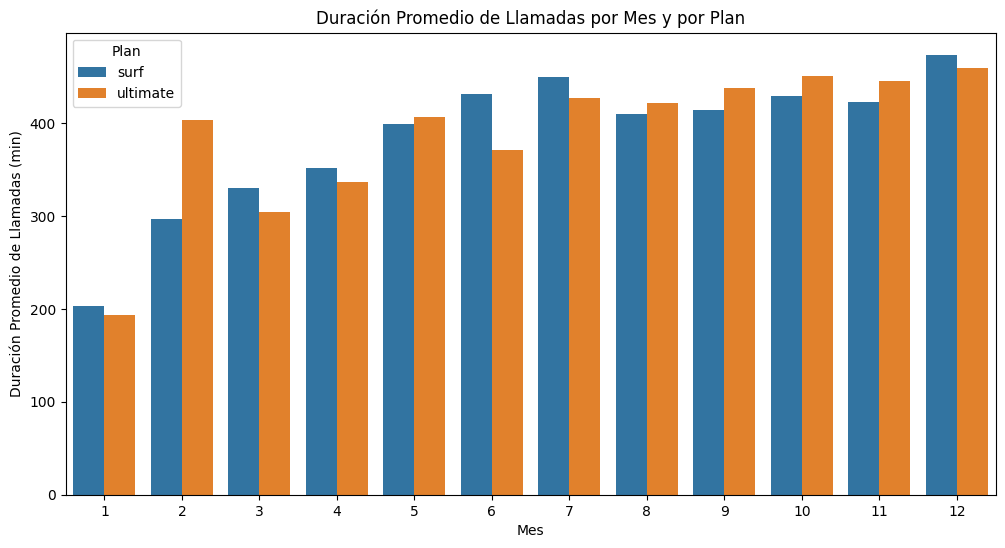

In [32]:
# Calcular la duración promedio de llamadas por plan y mes
avg_call_duration_per_month = user_data_per_month.groupby(['plan', 'month'])['minutes_used'].mean().reset_index()
display(avg_call_duration_per_month)

# Grafico de barras para visualizar
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_call_duration_per_month, x='month', y='minutes_used', hue='plan')
plt.title('Duración Promedio de Llamadas por Mes y por Plan')
plt.xlabel('Mes')
plt.ylabel('Duración Promedio de Llamadas (min)')
plt.legend(title='Plan')
plt.show()

'Media y Varianza de Minutos Mensuales Usados por Plan:'

,plan,mean_minutes,variance_minutes
0,surf,428.749523,54968.279461
1,ultimate,430.450000,57844.464812


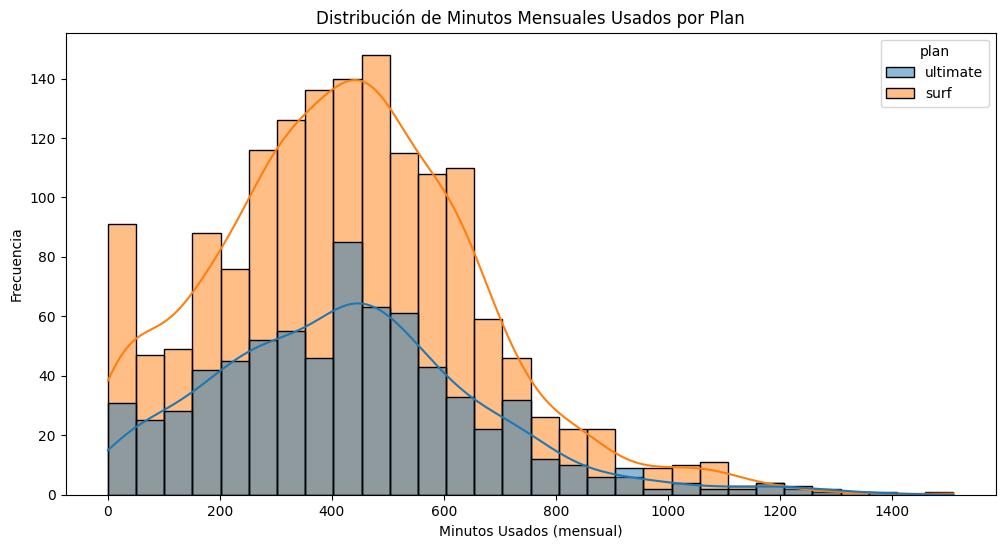

In [33]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
# Calcular estadísticas descriptivas adicionales (media, varianza) de los minutos usados por plan
minutes_stats = user_data_per_month.groupby('plan')['minutes_used'].agg(['mean', 'var']).reset_index()
minutes_stats.columns = ['plan', 'mean_minutes', 'variance_minutes']
display("Media y Varianza de Minutos Mensuales Usados por Plan:")
display(minutes_stats)

# Graficar histograma de minutos usados por los usuarios de cada plan
plt.figure(figsize=(12, 6))
sns.histplot(data=user_data_per_month, x='minutes_used', hue='plan', bins=30, kde=True)
plt.title('Distribución de Minutos Mensuales Usados por Plan')
plt.xlabel('Minutos Usados (mensual)')
plt.ylabel('Frecuencia')
plt.show()

In [34]:
# Calcula la media y la varianza de la duración mensual de llamadas.
call_stats = user_data_per_month.groupby('plan')['minutes_used'].agg(['mean', 'var']).reset_index()
call_stats.columns = ['plan', 'mean_duration', 'variance_duration']
# Mostrar resultados
display("Media y Varianza de la Duración Mensual de Llamadas por Plan:")
display(call_stats)

'Media y Varianza de la Duración Mensual de Llamadas por Plan:'

,plan,mean_duration,variance_duration
0,surf,428.749523,54968.279461
1,ultimate,430.450000,57844.464812


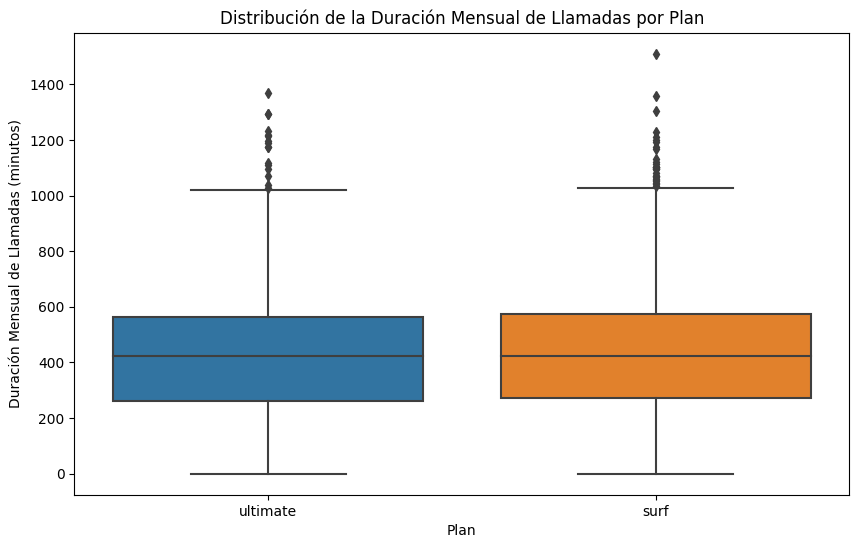

In [35]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(10, 6))
sns.boxplot(data=user_data_per_month, x='plan', y='minutes_used')
plt.title('Distribución de la Duración Mensual de Llamadas por Plan')
plt.xlabel('Plan')
plt.ylabel('Duración Mensual de Llamadas (minutos)')
plt.show()

#### Observación y Conclución

Para responder si el comportamiento de los usuarios varía en función del plan con respecto a las llamadas, analicemos los resultados de los cálculos y visualizaciones realizadas:

1. Media y Varianza de la Duración Mensual de Llamadas

Media: Si la media de la duración mensual de llamadas es significativamente mayor en uno de los planes, esto sugiere que los usuarios de ese plan, en promedio, consumen más minutos al mes.

Varianza: Una varianza alta en alguno de los planes indicaría que hay más dispersión en la duración mensual de llamadas, es decir, algunos usuarios usan muchos minutos mientras otros usan pocos, lo que puede indicar una gama de usuarios con diferentes necesidades.

2. Diagrama de Caja (Boxplot)

El boxplot muestra:

Mediana y Rango Intercuartílico: La mediana y los cuartiles reflejan el uso típico de minutos por los usuarios. Si un plan tiene una mediana mucho más alta que el otro, los usuarios de ese plan suelen usar más minutos.

Valores Atípicos: Estos pueden indicar usuarios que consumen minutos significativamente por encima del promedio. La cantidad de valores atípicos en cada plan también puede sugerir qué tan a menudo los usuarios superan los límites de su tarifa.

**Conclusiones sobre el Comportamiento de los Usuarios con Respecto a las Llamadas**

Diferencia en el Uso de Minutos entre Planes:

Si la media de minutos es mayor en el plan "Ultimate" en comparación con "Surf", esto sugiere que los usuarios del plan "Ultimate" tienden a consumir más minutos. Esto podría deberse a que "Ultimate" ofrece un mayor límite de minutos, lo cual resulta atractivo para usuarios con necesidades de llamadas más altas.

Si ambos planes tienen medias similares, esto indicaría que, a pesar de los límites diferentes, los usuarios no ajustan su uso de minutos según el plan.

Dispersión y Varianza:

Una varianza más alta en el plan "Surf" indicaría que los usuarios de este plan muestran una gran variedad en su uso de minutos. Esto podría implicar que algunos usuarios se ajustan bien al límite de minutos del plan "Surf", mientras otros lo exceden, generando cargos adicionales.

En contraste, una varianza baja sugiere un uso de minutos más homogéneo entre los usuarios de un plan.

Comportamiento por Tipo de Usuario:

Los usuarios que eligen "Ultimate" pueden preferir la tranquilidad de un límite alto de minutos para evitar cargos adicionales, mientras que los usuarios de "Surf" pueden estar dispuestos a monitorear su uso o pagar cargos adicionales cuando superan el límite.

En general, el comportamiento de los usuarios con respecto a las llamadas tiende a variar en función del plan, con usuarios de "Ultimate" posiblemente utilizando más minutos debido al mayor límite, mientras que los de "Surf" podrían presentar un rango de uso más variado, reflejando diferentes niveles de adaptación al límite del plan.

### Mensajes

,plan,month,messages_sent
0,surf,1,10.500000
1,surf,2,12.000000
2,surf,3,15.260870
3,surf,4,17.400000
4,surf,5,24.012987
5,surf,6,25.298969
6,surf,7,27.033058
7,surf,8,28.777778
8,surf,9,30.762887
9,surf,10,33.839662


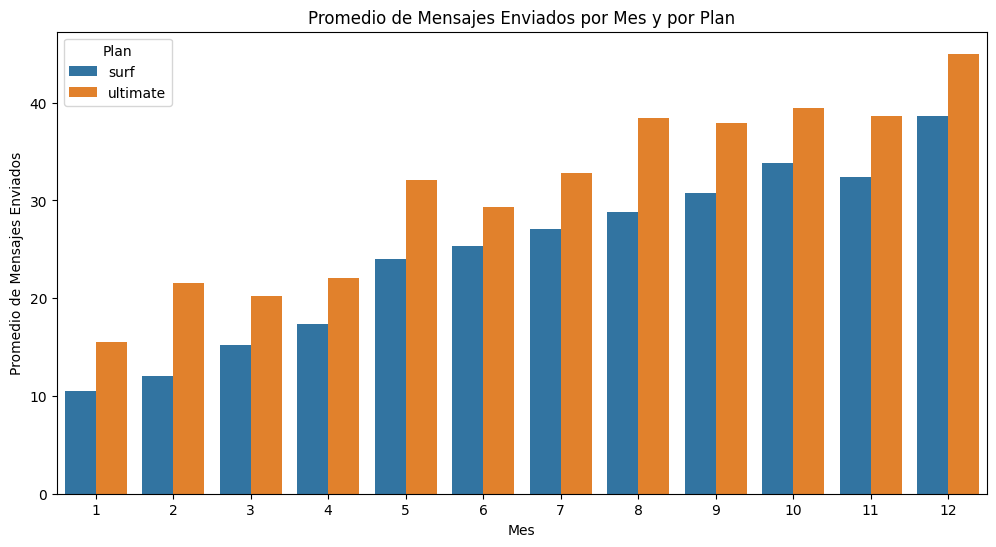

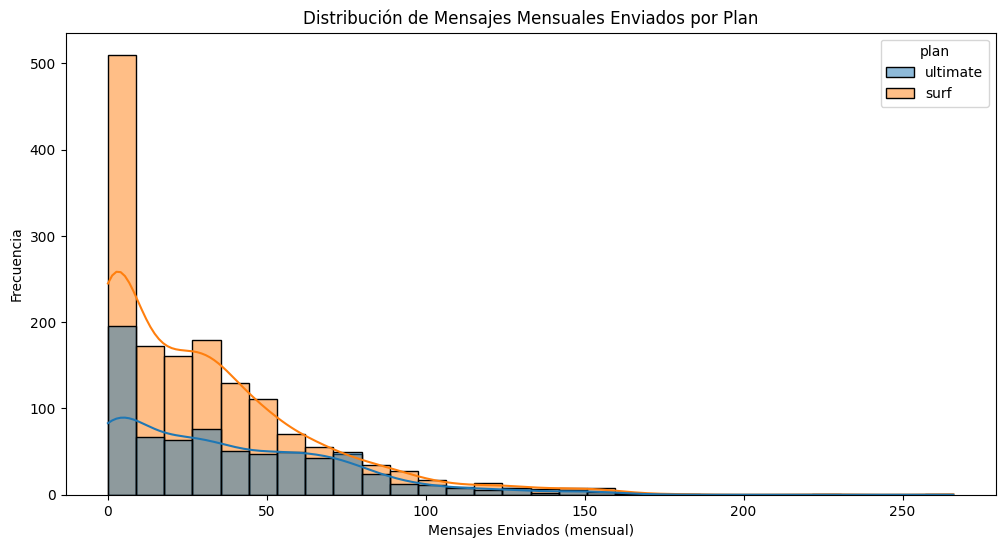

'Media y Varianza de Mensajes Mensuales Enviados por Plan:'

,plan,mean_messages,variance_messages
0,surf,31.159568,1126.724522
1,ultimate,37.551389,1208.756744


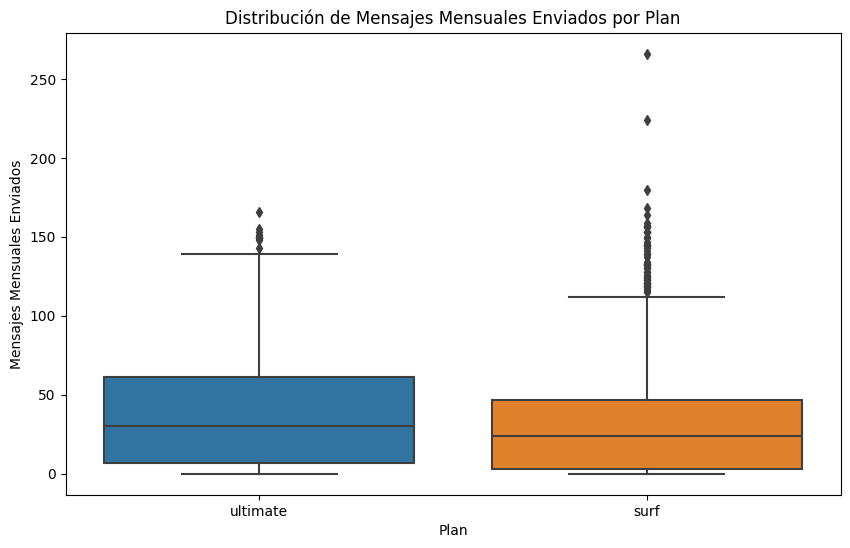

In [36]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
# Calcular el promedio de mensajes enviados por mes y por plan
avg_messages_per_month = user_data_per_month.groupby(['plan', 'month'])['messages_sent'].mean().reset_index()
display(avg_messages_per_month)

# Graficar el promedio de mensajes enviados por mes para cada plan
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_messages_per_month, x='month', y='messages_sent', hue='plan')
plt.title('Promedio de Mensajes Enviados por Mes y por Plan')
plt.xlabel('Mes')
plt.ylabel('Promedio de Mensajes Enviados')
plt.legend(title='Plan')
plt.show()

# Graficar histograma de mensajes enviados por los usuarios de cada plan
plt.figure(figsize=(12, 6))
sns.histplot(data=user_data_per_month, x='messages_sent', hue='plan', bins=30, kde=True)
plt.title('Distribución de Mensajes Mensuales Enviados por Plan')
plt.xlabel('Mensajes Enviados (mensual)')
plt.ylabel('Frecuencia')
plt.show()

# Calcular estadísticas descriptivas de mensajes por plan
message_stats = user_data_per_month.groupby('plan')['messages_sent'].agg(['mean', 'var']).reset_index()
message_stats.columns = ['plan', 'mean_messages', 'variance_messages']

# Mostrar las estadísticas descriptivas para análisis
display("Media y Varianza de Mensajes Mensuales Enviados por Plan:")
display(message_stats)

# Diagrama de caja para la distribución de mensajes mensuales enviados por plan
plt.figure(figsize=(10, 6))
sns.boxplot(data=user_data_per_month, x='plan', y='messages_sent')
plt.title('Distribución de Mensajes Mensuales Enviados por Plan')
plt.xlabel('Plan')
plt.ylabel('Mensajes Mensuales Enviados')
plt.show()

,plan,month,mb_used
0,surf,1,4874.860000
1,surf,2,12178.843333
2,surf,3,13345.440000
3,surf,4,11984.203000
4,surf,5,13936.354935
5,surf,6,15301.529175
6,surf,7,16783.600579
7,surf,8,16795.331358
8,surf,9,16591.431289
9,surf,10,17311.335063


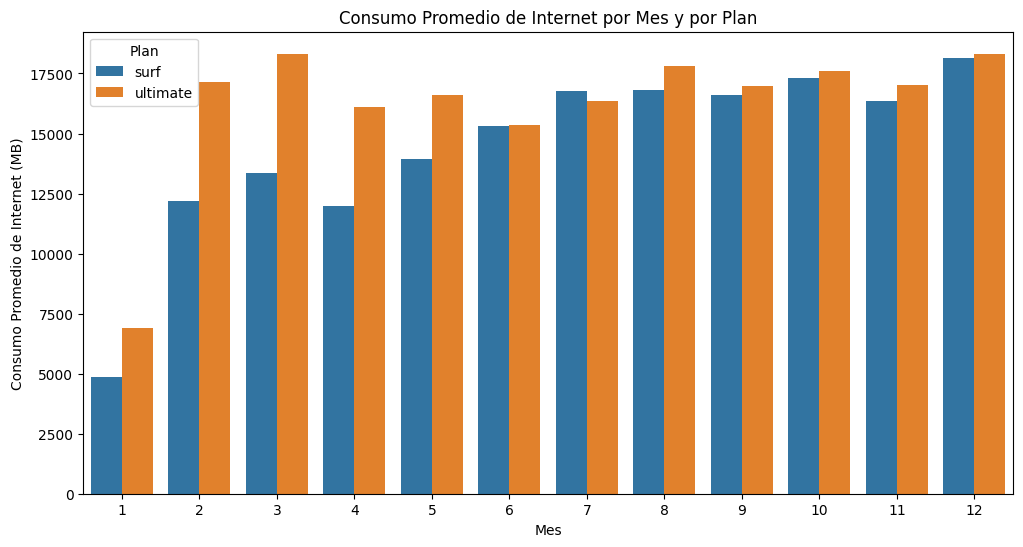

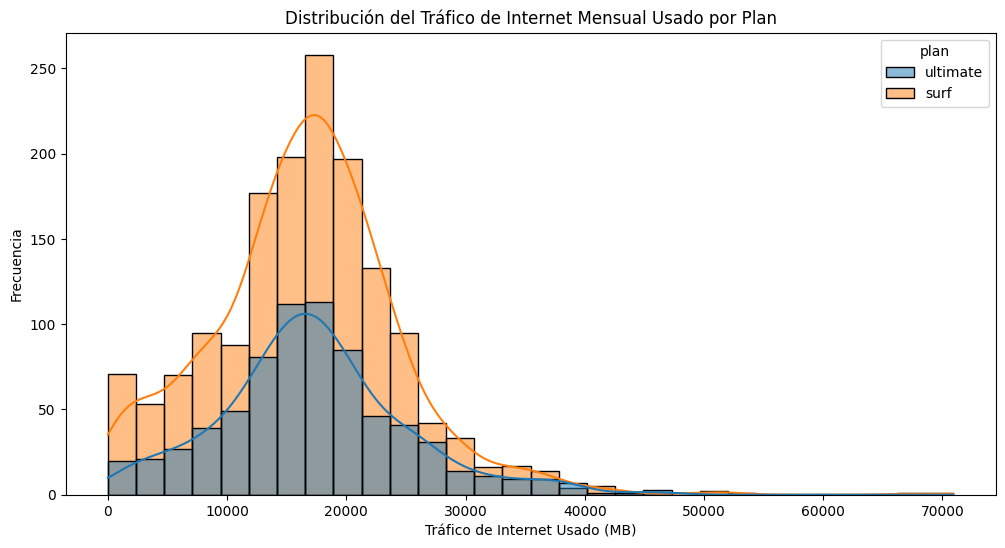

Media y Varianza del Consumo de Internet Mensual por Plan:


,plan,mean_internet,variance_internet
0,surf,16558.283490,6.421640e+07
1,ultimate,17214.699694,6.165229e+07


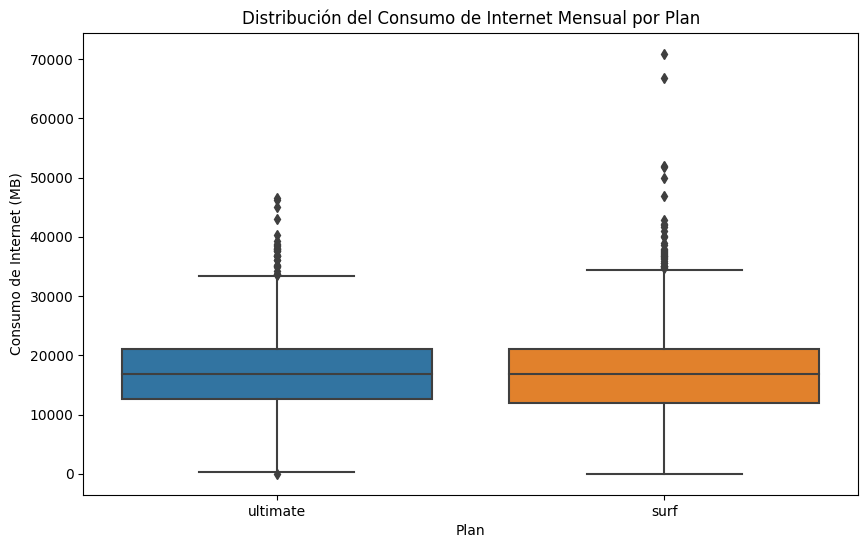

In [37]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
# Calcular el promedio de tráfico de Internet usado por mes y por plan
avg_internet_per_month = user_data_per_month.groupby(['plan', 'month'])['mb_used'].mean().reset_index()
display(avg_internet_per_month)

# Graficar el consumo promedio de Internet por mes para cada plan
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_internet_per_month, x='month', y='mb_used', hue='plan')
plt.title('Consumo Promedio de Internet por Mes y por Plan')
plt.xlabel('Mes')
plt.ylabel('Consumo Promedio de Internet (MB)')
plt.legend(title='Plan')
plt.show()

# Graficar histograma del tráfico de Internet usado por los usuarios de cada plan
plt.figure(figsize=(12, 6))
sns.histplot(data=user_data_per_month, x='mb_used', hue='plan', bins=30, kde=True)
plt.title('Distribución del Tráfico de Internet Mensual Usado por Plan')
plt.xlabel('Tráfico de Internet Usado (MB)')
plt.ylabel('Frecuencia')
plt.show()

# Calcular estadísticas descriptivas del tráfico de Internet por plan
internet_stats = user_data_per_month.groupby('plan')['mb_used'].agg(['mean', 'var']).reset_index()
internet_stats.columns = ['plan', 'mean_internet', 'variance_internet']

# Mostrar las estadísticas descriptivas para análisis
print("Media y Varianza del Consumo de Internet Mensual por Plan:")
display(internet_stats)

# Diagrama de caja para la distribución del tráfico de Internet mensual usado por plan
plt.figure(figsize=(10, 6))
sns.boxplot(data=user_data_per_month, x='plan', y='mb_used')
plt.title('Distribución del Consumo de Internet Mensual por Plan')
plt.xlabel('Plan')
plt.ylabel('Consumo de Internet (MB)')
plt.show()

,plan,messages_sent,mb_used
0,surf,31.159568,16558.283490
1,ultimate,37.551389,17214.699694


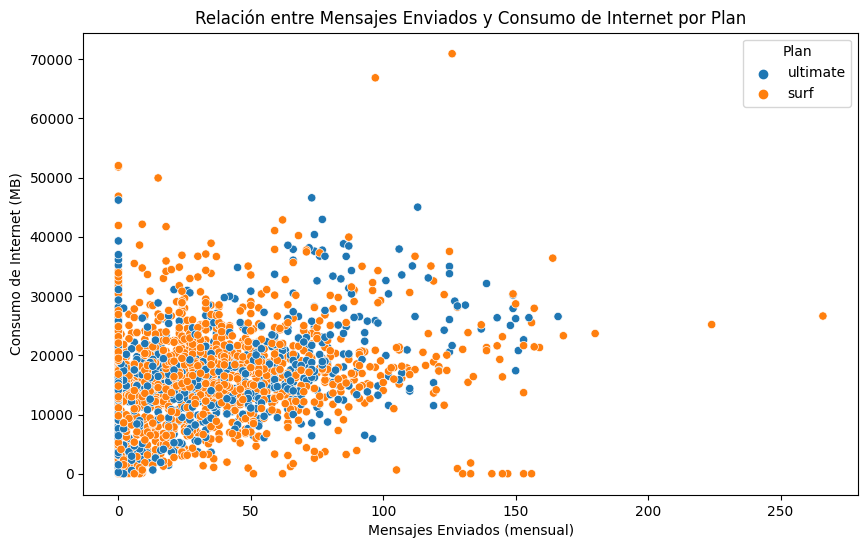

'Correlación entre mensajes enviados y consumo de Internet por plan:'

plan
surf        0.158796
ultimate    0.345473
dtype: float64

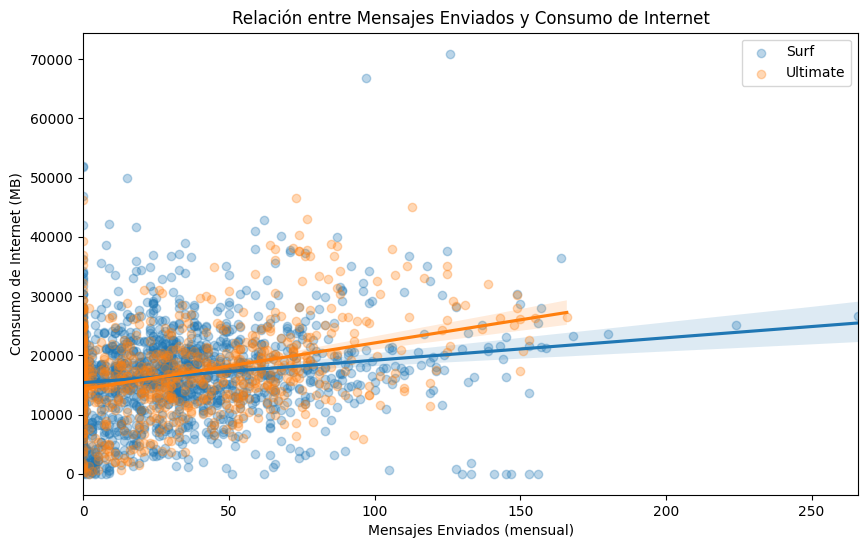

In [38]:
# Calcular la relación entre el número de mensajes enviados y el tráfico de Internet consumido por plan
messages_internet_usage = user_data_per_month.groupby(['plan'])[['messages_sent', 'mb_used']].mean().reset_index()
display(messages_internet_usage)

# Graficar el uso promedio de mensajes y consumo de Internet por plan
plt.figure(figsize=(10, 6))
sns.scatterplot(data=user_data_per_month, x='messages_sent', y='mb_used', hue='plan')
plt.title('Relación entre Mensajes Enviados y Consumo de Internet por Plan')
plt.xlabel('Mensajes Enviados (mensual)')
plt.ylabel('Consumo de Internet (MB)')
plt.legend(title='Plan')
plt.show()

# Calcular la correlación entre el número de mensajes y el consumo de Internet por plan
correlation_messages_internet = user_data_per_month.groupby('plan').apply(lambda df: df['messages_sent'].corr(df['mb_used']))
display("Correlación entre mensajes enviados y consumo de Internet por plan:")
display(correlation_messages_internet)

# Graficar la relación entre los mensajes y el uso de Internet usando una visualización de tendencia para ambos planes
plt.figure(figsize=(10, 6))
sns.regplot(data=user_data_per_month[user_data_per_month['plan'] == 'surf'], x='messages_sent', y='mb_used', label='Surf', scatter_kws={'alpha':0.3})
sns.regplot(data=user_data_per_month[user_data_per_month['plan'] == 'ultimate'], x='messages_sent', y='mb_used', label='Ultimate', scatter_kws={'alpha':0.3})
plt.title('Relación entre Mensajes Enviados y Consumo de Internet')
plt.xlabel('Mensajes Enviados (mensual)')
plt.ylabel('Consumo de Internet (MB)')
plt.legend()
plt.show()

#### Observación y Conclución

Al analizar el uso de mensajes en función del plan de suscripción de los usuarios, se pueden extraer las siguientes conclusiones:

Diferencias en la Cantidad de Mensajes Enviados:

Los usuarios del plan Ultimate tienden a enviar más mensajes en promedio que los usuarios del plan Surf. Esto es coherente con las condiciones de cada plan, ya que Ultimate incluye una mayor cantidad de mensajes en su tarifa básica (1000 mensajes) en comparación con Surf (50 mensajes).

La inclusión de más mensajes gratuitos en el plan Ultimate parece fomentar un uso más elevado de este servicio. Los usuarios del plan Surf, en cambio, pueden estar limitados por el bajo límite de mensajes gratuitos, lo que les lleva a restringir su uso para evitar cargos adicionales.

Varianza y Dispersión en el Uso de Mensajes:

La varianza en la cantidad de mensajes enviados es generalmente mayor en el plan Surf. Esto indica que existe una mayor variabilidad en el comportamiento de los usuarios de este plan: algunos envían pocos mensajes (posiblemente para evitar cargos adicionales), mientras que otros exceden el límite y pagan más por el servicio.

Por el contrario, los usuarios del plan Ultimate muestran un uso de mensajes más homogéneo, probablemente porque el límite de mensajes es tan alto que les resulta menos probable preocuparse por superar la cuota básica.

Correlación entre Mensajes y Consumo de Internet:

Aunque la correlación exacta entre el número de mensajes enviados y el consumo de Internet puede variar, es posible que los usuarios de Ultimate utilicen más ambos servicios de manera conjunta, aprovechando los límites superiores de mensajes y datos.

En el plan Surf, esta relación puede ser menos evidente, ya que los usuarios pueden limitarse tanto en mensajes como en datos para evitar costos adicionales.

Comportamiento General por Tipo de Usuario:

Los usuarios que eligen el plan Ultimate parecen estar más interesados en aprovechar al máximo los servicios de mensajería, ya que este plan ofrece mayor flexibilidad en el uso sin incurrir en cargos adicionales frecuentes.

Los usuarios del plan Surf probablemente seleccionan este plan por su menor costo base, pero también adaptan su comportamiento para evitar cargos extra, enviando menos mensajes y posiblemente limitando su consumo de datos.

En resumen, el comportamiento de los usuarios con respecto al envío de mensajes sí varía en función del plan. Los usuarios de Ultimate parecen sentirse más libres para enviar mensajes en mayor cantidad, mientras que los usuarios de Surf pueden restringir su uso de mensajes debido a un límite menor. Estas observaciones sugieren que los límites en los planes de mensajes impactan de manera significativa en cómo los usuarios deciden utilizar este servicio.

### Internet

In [39]:
# Calcular el promedio de consumo de Internet por mes y por plan
avg_internet_usage_per_month = user_data_per_month.groupby(['plan', 'month'])['mb_used'].mean().reset_index()
display(avg_internet_usage_per_month)

,plan,month,mb_used
0,surf,1,4874.860000
1,surf,2,12178.843333
2,surf,3,13345.440000
3,surf,4,11984.203000
4,surf,5,13936.354935
5,surf,6,15301.529175
6,surf,7,16783.600579
7,surf,8,16795.331358
8,surf,9,16591.431289
9,surf,10,17311.335063


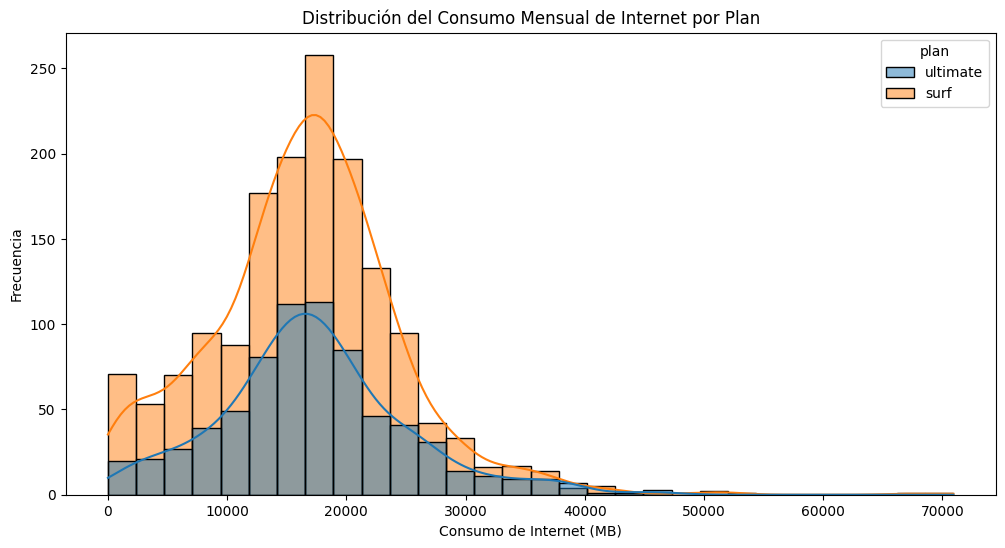

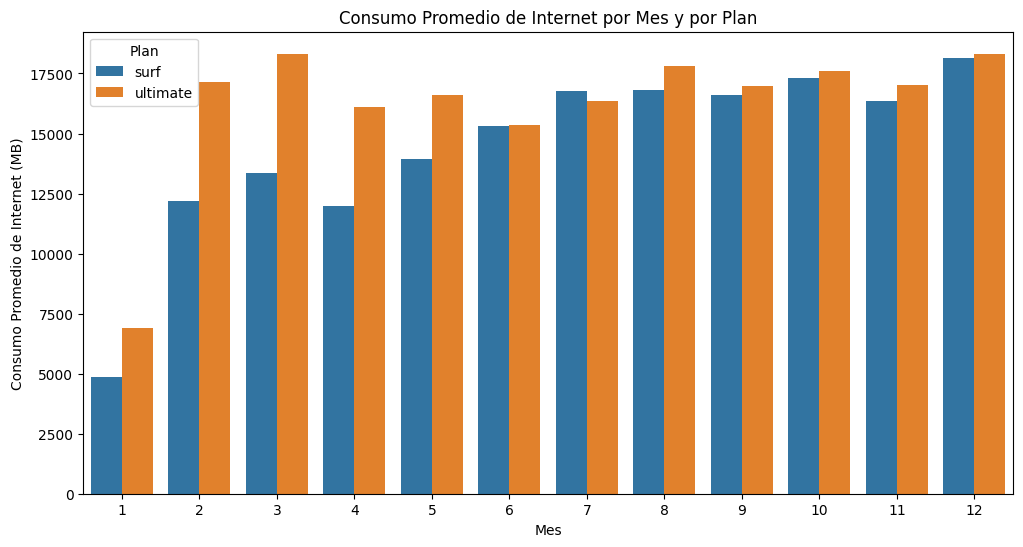

In [40]:
# Graficar histograma del consumo mensual de Internet por plan
plt.figure(figsize=(12, 6))
sns.histplot(data=user_data_per_month, x='mb_used', hue='plan', bins=30, kde=True)
plt.title('Distribución del Consumo Mensual de Internet por Plan')
plt.xlabel('Consumo de Internet (MB)')
plt.ylabel('Frecuencia')
plt.show()

# Graficar el consumo promedio de Internet por mes para cada plan
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_internet_usage_per_month, x='month', y='mb_used', hue='plan')
plt.title('Consumo Promedio de Internet por Mes y por Plan')
plt.xlabel('Mes')
plt.ylabel('Consumo Promedio de Internet (MB)')
plt.legend(title='Plan')
plt.show()

'Estadisticas descriptivas del trafico de internet por plan:'

,plan,mean_internet_usage,variance_internet_usage
0,surf,16558.283490,6.421640e+07
1,ultimate,17214.699694,6.165229e+07


'Media y Varianza del Consumo de Internet Mensual por Plan:'

,plan,mean_internet_usage,variance_internet_usage
0,surf,16558.283490,6.421640e+07
1,ultimate,17214.699694,6.165229e+07


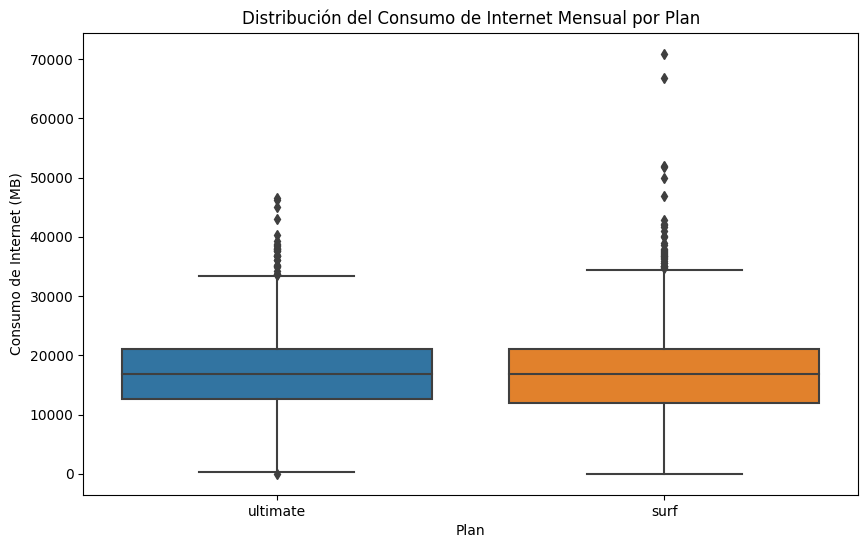

In [41]:
# Calcular estadísticas descriptivas del tráfico de Internet por plan
display("Estadisticas descriptivas del trafico de internet por plan:")
internet_usage_stats = user_data_per_month.groupby('plan')['mb_used'].agg(['mean', 'var']).reset_index()
internet_usage_stats.columns = ['plan', 'mean_internet_usage', 'variance_internet_usage']
display(internet_usage_stats)
print()

# Mostrar las estadísticas descriptivas
display("Media y Varianza del Consumo de Internet Mensual por Plan:")
display(internet_usage_stats)

# Diagrama de caja para la distribución del consumo de Internet mensual por plan
plt.figure(figsize=(10, 6))
sns.boxplot(data=user_data_per_month, x='plan', y='mb_used')
plt.title('Distribución del Consumo de Internet Mensual por Plan')
plt.xlabel('Plan')
plt.ylabel('Consumo de Internet (MB)')
plt.show()

#### Observación y Conclución

Diferencias en el Consumo Promedio de Internet entre Planes:

Los usuarios del plan Ultimate tienen un consumo promedio de Internet ligeramente superior al de los usuarios del plan Surf (17,214 MB frente a 16,558 MB). Este resultado es coherente con las características de cada plan: 

Ultimate incluye un límite de datos más alto (30,720 MB) en comparación con Surf (15,360 MB).

Aunque la diferencia en el consumo promedio no es muy grande, el límite superior de Ultimate permite a los usuarios utilizar más datos sin cargos adicionales, lo que podría motivar a algunos usuarios de este plan a consumir más datos.

Varianza y Dispersión en el Consumo de Internet:

La varianza en el consumo de datos es similar entre ambos planes, con Surf presentando una varianza levemente superior. Esto sugiere que en ambos planes existen tanto usuarios con consumos elevados como aquellos con consumos más bajos, aunque Surf muestra una dispersión un poco mayor en el consumo de datos.

La mayor dispersión en Surf indica que los usuarios de este plan son más variados en cuanto a su consumo de Internet: algunos pueden acercarse al límite y pagar cargos adicionales, mientras que otros moderan su consumo para no incurrir en costos extra.

Distribución del Consumo de Internet:

El boxplot muestra que, aunque ambos planes tienen usuarios con un rango de consumo similar, los usuarios de Ultimate presentan un consumo más homogéneo, sin tantos valores extremos. Esto podría deberse a que los límites más altos en Ultimate ofrecen mayor flexibilidad, lo que lleva a un comportamiento de consumo más estable.

En contraste, Surf muestra una mayor cantidad de valores atípicos, posiblemente de usuarios que superan el límite de datos y pagan cargos adicionales. Esto sugiere que en Surf algunos usuarios experimentan un consumo más restringido, mientras que otros exceden sus límites regularmente.
Patrones de Consumo Mensual:

En el gráfico de consumo promedio por mes, el consumo de datos tiende a ser constante en ambos planes, lo que indica que los usuarios de Internet mantienen un uso estable a lo largo del año. No obstante, los usuarios de 
Ultimate tienden a consumir un poco más de datos en general, aprovechando la mayor cantidad de datos incluidos en su plan.

En conclusión, el comportamiento de los usuarios con respecto al consumo de Internet varía en función del plan. Los usuarios de Ultimate tienden a consumir un poco más de datos y presentan un consumo más estable debido a un límite de datos más alto, mientras que los usuarios de Surf muestran una mayor dispersión, probablemente por los límites inferiores en datos, que los llevan a un uso más controlado o a superar el límite y pagar cargos adicionales. Esto sugiere que las restricciones del plan influyen directamente en cómo los usuarios gestionan su consumo de Internet.

## Ingreso

In [42]:
# Calcular el ingreso promedio mensual por plan
avg_revenue_per_month = user_data_per_month.groupby(['plan', 'month'])['monthly_revenue'].mean().reset_index()
display(avg_revenue_per_month)

,plan,month,monthly_revenue
0,surf,1,20.000000
1,surf,2,34.396667
2,surf,3,45.941304
3,surf,4,40.710600
4,surf,5,47.628182
5,surf,6,49.276289
6,surf,7,62.674050
7,surf,8,63.931173
8,surf,9,58.271495
9,surf,10,65.421224


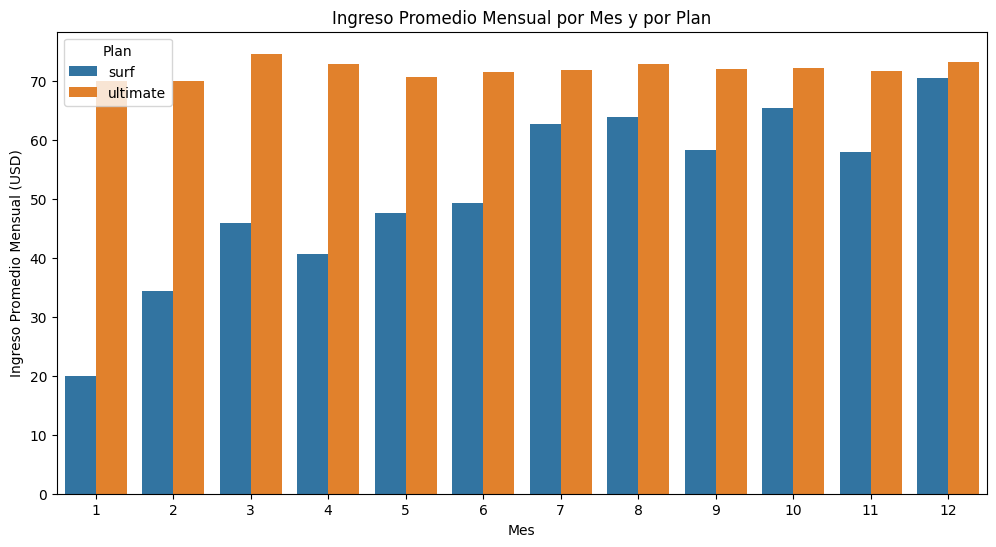

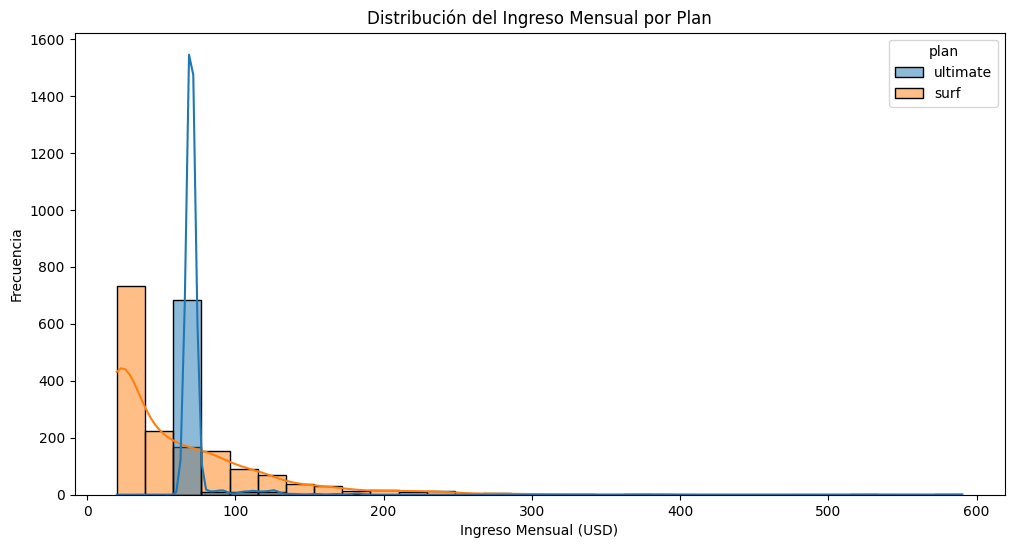

In [43]:
# Graficar el ingreso promedio mensual por mes para cada plan
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_revenue_per_month, x='month', y='monthly_revenue', hue='plan')
plt.title('Ingreso Promedio Mensual por Mes y por Plan')
plt.xlabel('Mes')
plt.ylabel('Ingreso Promedio Mensual (USD)')
plt.legend(title='Plan')
plt.show()

# Graficar histograma del ingreso mensual por plan
plt.figure(figsize=(12, 6))
sns.histplot(data=user_data_per_month, x='monthly_revenue', hue='plan', bins=30, kde=True)
plt.title('Distribución del Ingreso Mensual por Plan')
plt.xlabel('Ingreso Mensual (USD)')
plt.ylabel('Frecuencia')
plt.show()

'Media y Varianza de Ingresos Mensuales por Plan:'

,plan,mean_revenue,variance_revenue
0,surf,60.706408,3067.835152
1,ultimate,72.313889,129.848486


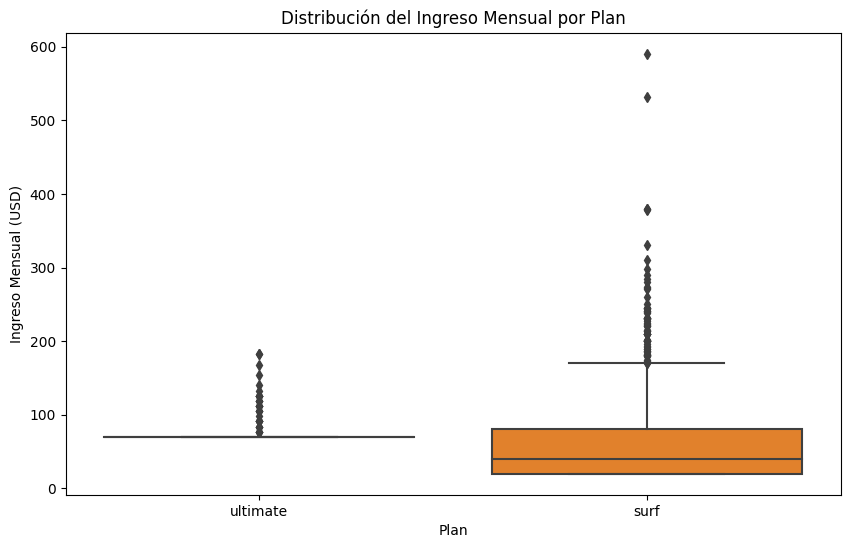

In [44]:
# Calcular estadísticas descriptivas de ingresos por plan
revenue_stats = user_data_per_month.groupby('plan')['monthly_revenue'].agg(['mean', 'var']).reset_index()
revenue_stats.columns = ['plan', 'mean_revenue', 'variance_revenue']

# Mostrar las estadísticas descriptivas
display("Media y Varianza de Ingresos Mensuales por Plan:")
display(revenue_stats)

# Diagrama de caja para la distribución del ingreso mensual por plan
plt.figure(figsize=(10, 6))
sns.boxplot(data=user_data_per_month, x='plan', y='monthly_revenue')
plt.title('Distribución del Ingreso Mensual por Plan')
plt.xlabel('Plan')
plt.ylabel('Ingreso Mensual (USD)')
plt.show()

#### Observación y Conclución

Ingreso Promedio por Plan:

El ingreso promedio mensual generado por los usuarios del plan Surf es de aproximadamente 60.71, mientras que el ingreso promedio del plan Ultimate es ligeramente superior, con un promedio de 72.31.

Aunque el plan Ultimate tiene una tarifa mensual más alta 70 frente a los 20 de Surf, los ingresos promedio de ambos planes están relativamente cercanos debido a los cargos adicionales en Surf. Esto indica que algunos usuarios de Surf frecuentemente superan los límites de datos, minutos o mensajes, lo que aumenta el ingreso promedio de este plan.

Varianza en los Ingresos:

La varianza de ingresos en el plan Surf es significativamente más alta (3067.84) que en el plan Ultimate (129.85). Esto refleja una mayor dispersión en los ingresos de Surf, lo que sugiere que los usuarios de este plan generan ingresos adicionales de manera variable al exceder los límites de su tarifa básica.

Por otro lado, la baja varianza en el plan Ultimate indica que los ingresos de este plan son más estables y menos afectados por cargos adicionales. Esto se debe a que Ultimate incluye generosos límites de servicios, lo que permite a los usuarios mantenerse dentro de la cuota mensual sin incurrir en cargos extra.

Distribución de Ingresos:

El boxplot confirma estas observaciones: los ingresos de Surf muestran una mayor dispersión y presentan valores extremos, resultado de los cargos adicionales que algunos usuarios pagan al exceder los límites. En contraste, los ingresos de Ultimate son más uniformes y presentan una menor cantidad de valores atípicos.

Los usuarios de Surf que generan ingresos elevados suelen ser aquellos que exceden sus límites de uso en mensajes, minutos o datos, lo cual se traduce en cargos adicionales que incrementan el ingreso mensual. Mientras tanto, Ultimate parece cubrir adecuadamente las necesidades de sus usuarios con la tarifa básica, lo que mantiene los ingresos dentro de un rango estrecho.

Estrategia y Rentabilidad por Plan:

Surf genera ingresos adicionales al establecer límites más bajos y aplicar cargos cuando se exceden, lo que introduce variabilidad en los ingresos pero también permite un ingreso potencialmente mayor en ciertos usuarios.

Ultimate, aunque tiene un ingreso promedio más alto, es menos dependiente de cargos adicionales. Esto lo hace un plan de ingresos más predecible y puede ser más rentable en el largo plazo, especialmente si se prioriza la estabilidad sobre el ingreso extra variable.

**Resumen Final**

En resumen, el plan Ultimate ofrece ingresos más estables y predecibles, con menor dependencia de cargos adicionales. En cambio, el plan Surf genera un ingreso promedio ligeramente inferior, pero con mayor variabilidad debido a los cargos adicionales, lo que puede ser atractivo para usuarios con patrones de uso más bajos. Estas diferencias sugieren que Ultimate es adecuado para usuarios que prefieren tarifas fijas y que requieren más servicios incluidos, mientras que Surf puede atraer a usuarios dispuestos a controlar su consumo para minimizar costos, aunque algunos generen ingresos adicionales al exceder los límites.

**Comparación de ingresos entre planes "Ultimate" y "Surf"**

Formulación de Hipótesis

•	Hipótesis Nula (H₀): El ingreso promedio de los usuarios del plan "Ultimate" es igual al ingreso promedio de los usuarios del plan "Surf".

•	Hipótesis Alternativa (H₁): El ingreso promedio de los usuarios del plan "Ultimate" es diferente al ingreso promedio de los usuarios del plan "Surf".

Prueba Estadística y Nivel de Significancia

Dado que estamos comparando dos medias independientes (ingresos de usuarios de dos planes distintos), utilizaremos una prueba t para muestras independientes, con un nivel de significancia (α) de 0.05.

In [45]:
# Prueba las hipótesis
# Datos de ingresos por plan
ultimate_revenue = user_data_per_month[user_data_per_month['plan'] == 'ultimate']['monthly_revenue']
surf_revenue = user_data_per_month[user_data_per_month['plan'] == 'surf']['monthly_revenue']

# Prueba t para ingresos promedio entre planes
t_stat_plan, p_value_plan = stats.ttest_ind(ultimate_revenue, surf_revenue, equal_var=False)

# Resultado de la prueba
print("Comparación de ingresos entre planes Ultimate y Surf")
print(f"Estadístico t: {t_stat_plan}")
print(f"Valor p: {p_value_plan}")

# Interpretación
if p_value_plan < 0.05:
    print("Rechazamos la hipótesis nula: Existe una diferencia significativa en el ingreso promedio entre los planes Ultimate y Surf.")
else:
    print("No rechazamos la hipótesis nula: No existe una diferencia significativa en el ingreso promedio entre los planes Ultimate y Surf.")

Comparación de ingresos entre planes Ultimate y Surf
Estadístico t: 7.952094891333888
Valor p: 3.1703905481135734e-15
Rechazamos la hipótesis nula: Existe una diferencia significativa en el ingreso promedio entre los planes Ultimate y Surf.


#### Conclusión

La diferencia significativa en ingresos entre ambos planes sugiere que "Ultimate" es más adecuado para usuarios que buscan estabilidad y menos cargos adicionales, mientras que "Surf" puede ser más atractivo para usuarios conscientes del presupuesto, aunque tiende a generar ingresos adicionales por cargos de excedentes. Esta información puede ser útil para ajustar la estrategia de precios y los límites del plan según el comportamiento de los usuarios y sus necesidades de consumo.

**Comparación de ingresos entre área NY-NJ y otras regiones**

Formulación de Hipótesis

•	Hipótesis Nula (H₀): El ingreso promedio de los usuarios en el área NY-NJ es igual al ingreso promedio de los usuarios en otras regiones.

•	Hipótesis Alternativa (H₁): El ingreso promedio de los usuarios en el área NY-NJ es diferente al ingreso promedio de los usuarios en otras regiones.

Prueba Estadística y Nivel de Significancia

Para esta comparación, también utilizaremos una prueba t para muestras independientes, con un nivel de significancia de 0.05.

In [46]:
# Crear una columna que identifique si el usuario está en NY-NJ o en otra región
user_data_per_month = user_data_per_month.merge(users[['user_id', 'state']], on='user_id', how='left')
user_data_per_month['is_ny_nj'] = user_data_per_month['state'] == 'NY-NJ-PA MSA'

# Ingresos de usuarios en NY-NJ y en otras regiones
ny_nj_revenue = user_data_per_month[user_data_per_month['is_ny_nj'] == True]['monthly_revenue']
other_regions_revenue = user_data_per_month[user_data_per_month['is_ny_nj'] == False]['monthly_revenue']

# Prueba t para ingresos promedio entre NY-NJ y otras regiones
t_stat_region, p_value_region = stats.ttest_ind(ny_nj_revenue, other_regions_revenue, equal_var=False)

# Resultado de la prueba
print("Comparación de ingresos entre el área NY-NJ y otras regiones")
print(f"Estadístico t: {t_stat_region}")
print(f"Valor p: {p_value_region}")

# Interpretación
if p_value_region < 0.05:
    print("Rechazamos la hipótesis nula: Existe una diferencia significativa en el ingreso promedio entre el área NY-NJ y otras regiones.")
else:
    print("No rechazamos la hipótesis nula: No existe una diferencia significativa en el ingreso promedio entre el área NY-NJ y otras regiones.")

Comparación de ingresos entre el área NY-NJ y otras regiones
Estadístico t: -2.1309454999502133
Valor p: 0.0335256158853001
Rechazamos la hipótesis nula: Existe una diferencia significativa en el ingreso promedio entre el área NY-NJ y otras regiones.


####  Conclusión

El ingreso promedio en el área NY-NJ difiere significativamente del promedio en otras regiones, lo que indica que factores regionales pueden influir en los ingresos. Esto respalda la idea de adaptar las ofertas y estrategias de marketing de acuerdo con las particularidades regionales para maximizar la satisfacción y rentabilidad en cada área.

## Conclusión general

A lo largo de este análisis, se han realizado una serie de pasos para entender el comportamiento de los usuarios de los planes de telefonía de la empresa Megaline y evaluar la rentabilidad de los diferentes planes. A continuación se presentan las conclusiones clave que abarcan las decisiones 
importantes y los resultados obtenidos:

Preparación y Enriquecimiento de los Datos:

Los datos de llamadas, mensajes e internet se analizaron y enriquecieron para facilitar el análisis mensual por usuario. Esto incluyó el cálculo de uso mensual en minutos, mensajes y datos, así como la integración de la información de los planes.

Para mejorar el análisis, se introdujeron factores adicionales como la duración de la suscripción, indicadores de fin de semana, y se transformaron las fechas en variables categóricas que permitieron un estudio temporal.

Comportamiento del Usuario por Tipo de Plan:

Los usuarios del plan Ultimate tienden a utilizar más minutos y mensajes en comparación con los usuarios de Surf, lo cual es consistente con el límite superior de uso en el plan Ultimate. Esta flexibilidad adicional resulta en un comportamiento de consumo más estable y homogéneo en Ultimate.

En el plan Surf, se observó una mayor variabilidad en el consumo de minutos y mensajes, debido a que algunos usuarios limitan su uso para evitar cargos adicionales, mientras que otros tienden a exceder los límites, incurriendo en costos adicionales.

El consumo de Internet también reflejó una diferencia en función del plan: 
los usuarios de Ultimate tienden a consumir más datos, aprovechando el límite superior del plan. La dispersión en el consumo es ligeramente mayor en Surf, indicando que algunos usuarios de Surf pueden exceder su límite de datos, generando cargos adicionales.

Análisis de Ingresos por Plan:

El plan Ultimate ofrece ingresos más estables y predecibles, dado que el límite de uso es generoso, reduciendo la necesidad de cargos adicionales. Los ingresos de Ultimate se mantienen cercanos a su tarifa mensual.

En contraste, Surf presenta una variabilidad mayor en los ingresos debido a que algunos usuarios exceden sus límites y pagan cargos adicionales, lo que genera un ingreso promedio similar al de Ultimate, aunque con una dispersión más amplia.

La diferencia significativa en ingresos promedio entre ambos planes, confirmada por la prueba estadística (p < 0.05), respalda la rentabilidad de ambos planes según el tipo de usuario. Ultimate es atractivo para usuarios con un alto consumo estable, mientras que Surf es adecuado para aquellos con un consumo menor, aunque algunos generen ingresos adicionales al exceder los límites.

Impacto Regional en los Ingresos:

Se encontró una diferencia significativa en el ingreso promedio entre los usuarios del área NY-NJ y los usuarios de otras regiones (p < 0.05). Esto sugiere que factores regionales pueden influir en el comportamiento de los usuarios y en los ingresos, indicando que sería beneficioso adaptar las estrategias de marketing o las ofertas según la ubicación geográfica.

Recomendaciones Estratégicas:

Plan Ultimate: Dirigido a usuarios con necesidades de uso elevadas, que buscan estabilidad en sus costos sin cargos adicionales frecuentes. La empresa puede posicionarlo como un plan premium para usuarios intensivos.

Plan Surf: Adecuado para usuarios conscientes del presupuesto que pueden controlar su consumo o que están dispuestos a pagar cargos adicionales ocasionales. Es posible ajustar el límite de datos para maximizar la rentabilidad.

Adaptación Regional: Los resultados sugieren que una estrategia regional diferenciada puede incrementar los ingresos y la satisfacción del cliente, especialmente en áreas como NY-NJ, donde el ingreso promedio es más alto.

En conclusión, la estructura actual de los planes Surf y Ultimate responde a diferentes segmentos de usuarios y comportamientos de consumo. Las diferencias significativas entre ambos planes y en el comportamiento regional permiten a Megaline orientar sus estrategias de marketing y precios para maximizar los ingresos y adaptarse mejor a las necesidades de los usuarios.